# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... ({e})")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vilyuchinsk
Processing Record 2 of Set 1 | beaufort west
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | acapulco de juarez
Processing Record 5 of Set 1 | crane
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | souillac
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | olinda
Processing Record 14 of Set 1 | emirgazi
Processing Record 15 of Set 1 | kailua-kona
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | ma'rib
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | umluj
Processing Record 21 of Set 1 | kayangel
Processing Record 22 of Set 1 | tomatlan
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vilyuchinsk,52.9306,158.4028,3.15,99,100,0.34,RU,1731892399
1,beaufort west,-32.3567,22.5830,21.67,38,0,1.29,ZA,1731892400
2,bethel,41.3712,-73.4140,10.92,45,100,1.61,US,1731892401
3,acapulco de juarez,16.8634,-99.8901,27.90,83,75,4.63,MX,1731892403
4,crane,31.3974,-102.3501,18.37,89,100,7.56,US,1731892404


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,3.15,99,100,0.34,RU,1731892399
1,beaufort west,-32.3567,22.5830,21.67,38,0,1.29,ZA,1731892400
2,bethel,41.3712,-73.4140,10.92,45,100,1.61,US,1731892401
3,acapulco de juarez,16.8634,-99.8901,27.90,83,75,4.63,MX,1731892403
4,crane,31.3974,-102.3501,18.37,89,100,7.56,US,1731892404


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

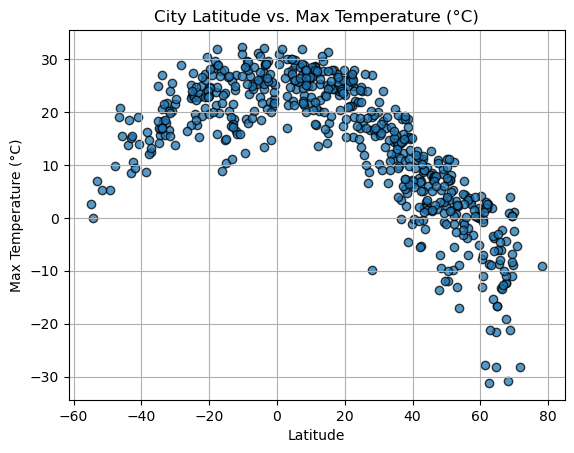

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

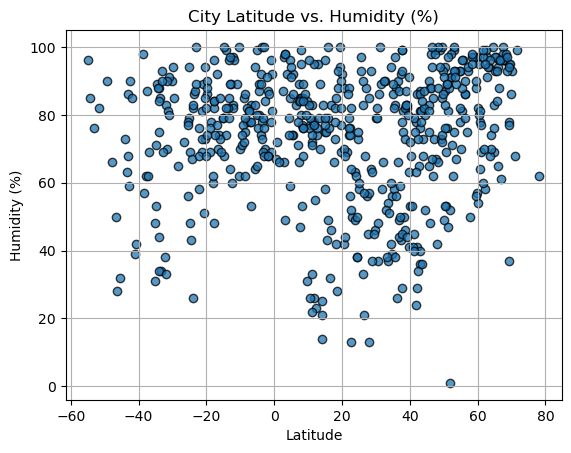

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

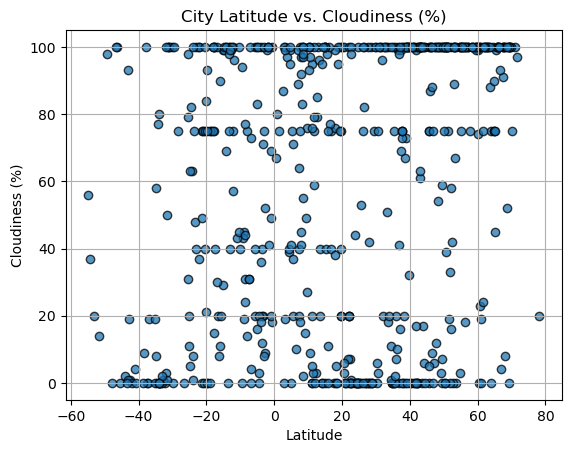

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

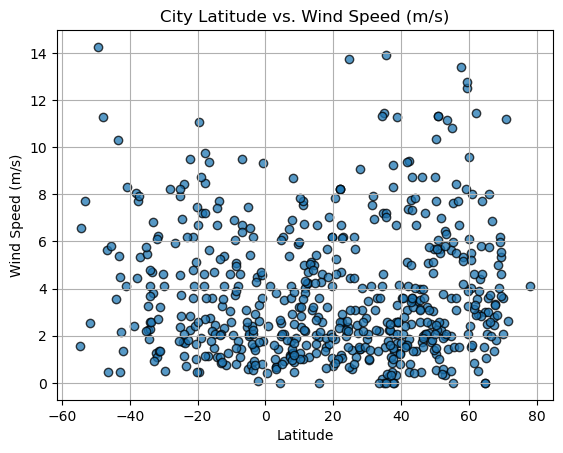

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate regression line
    regress_values = slope * x_values + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create scatter plot and regression line
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Add graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc="best")
    plt.grid(True)

    # Save the figure
    plt.savefig(save_path)

    # Show plot
    plt.show()

    # Print R-squared value
    print(f"R-squared: {r_value**2:.2f}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,3.15,99,100,0.34,RU,1731892399
2,bethel,41.3712,-73.4140,10.92,45,100,1.61,US,1731892401
3,acapulco de juarez,16.8634,-99.8901,27.90,83,75,4.63,MX,1731892403
4,crane,31.3974,-102.3501,18.37,89,100,7.56,US,1731892404
5,stanley,54.8680,-1.6985,-0.83,93,3,3.60,GB,1731892405


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,beaufort west,-32.3567,22.5830,21.67,38,0,1.29,ZA,1731892400
7,punta arenas,-53.1500,-70.9167,7.06,76,20,7.72,CL,1731892407
8,souillac,-20.5167,57.5167,24.21,73,40,5.14,MU,1731892408
9,bredasdorp,-34.5322,20.0403,15.61,89,0,2.24,ZA,1731892409
10,margaret river,-33.9500,115.0667,20.52,44,80,2.30,AU,1731892410


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.78


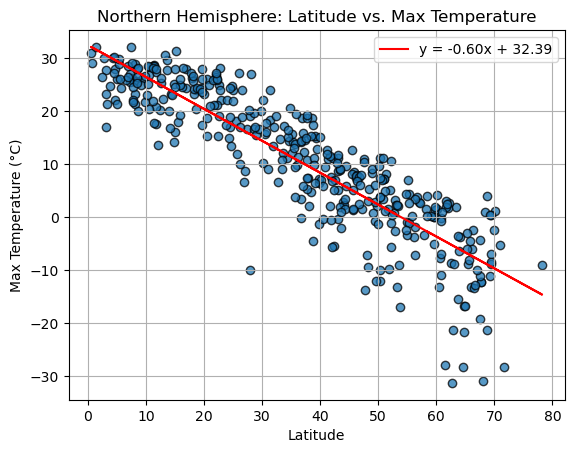

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-", label=line_eq)

plt.title("Northern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.legend(loc="best")
plt.grid(True)

print(f"R-squared: {r_value**2:.2f}")

plt.show()

R-squared: 0.37


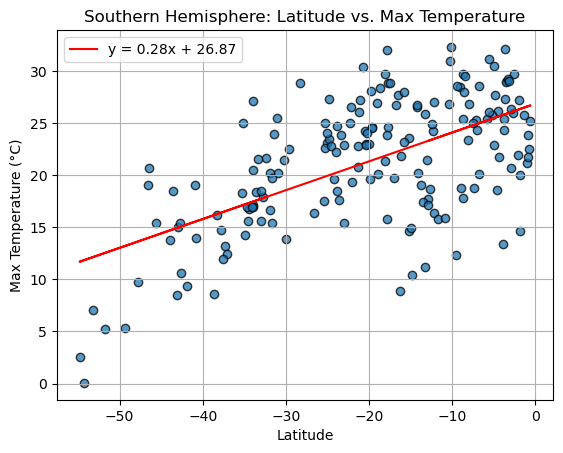

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-", label=line_eq)

plt.title("Southern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.legend(loc="best")
plt.grid(True)

print(f"R-squared: {r_value**2:.2f}")

plt.show()

**Discussion about the linear relationship:** Northern Hemisphere: when the latitude increases, the maximum temperature decreases. Southern Hemisphere: as latitude increases, maximum temperature increases. latitude and tempertaute is consistent with current weather patterns. 

### Humidity vs. Latitude Linear Regression Plot

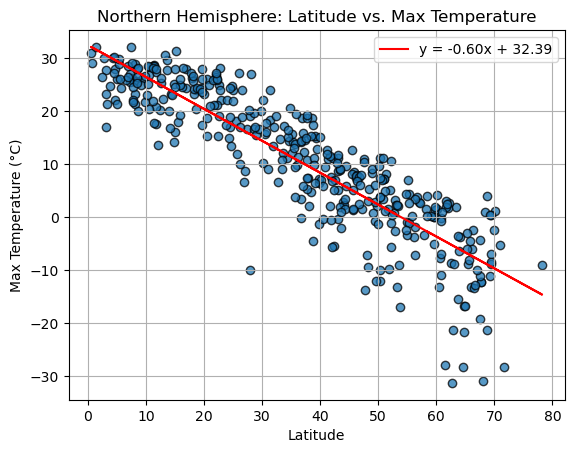

R-squared: 0.78


In [19]:
# Northern Hemisphere: Latitude vs. Max Temperature
plot_linear_regression(
    northern_hemi_df["Lat"],          
    northern_hemi_df["Max Temp"],     
    x_label="Latitude",               
    y_label="Max Temperature (°C)",   
    title="Northern Hemisphere: Latitude vs. Max Temperature",
    save_path="output_data/NH_Lat_vs_Temp.png" 

)

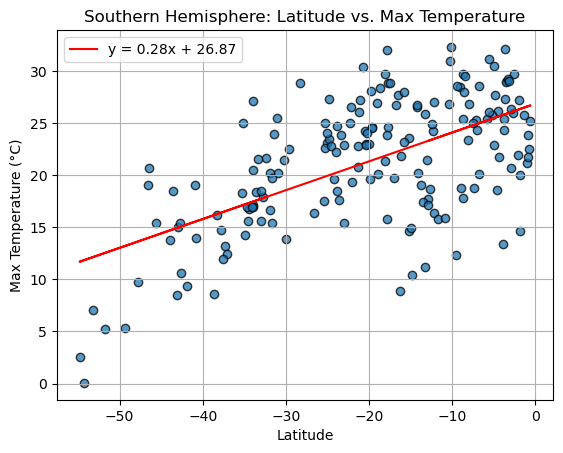

R-squared: 0.37


In [20]:
plot_linear_regression(
    southern_hemi_df["Lat"],         
    southern_hemi_df["Max Temp"],    
    x_label="Latitude",               
    y_label="Max Temperature (°C)",   
    title="Southern Hemisphere: Latitude vs. Max Temperature",
    save_path="output_data/SH_Lat_vs_Temp.png" 
)

**Discussion about the linear relationship:** Neither hemisphere have a strong relationship between latitude and humidity 

### Cloudiness vs. Latitude Linear Regression Plot

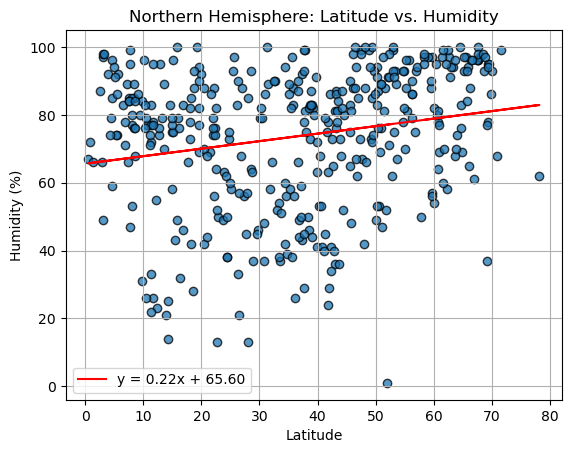

R-squared: 0.04


In [21]:
plot_linear_regression(
    northern_hemi_df["Lat"],          
    northern_hemi_df["Humidity"],    
    x_label="Latitude",               
    y_label="Humidity (%)",          
    title="Northern Hemisphere: Latitude vs. Humidity",
    save_path="output_data/NH_Lat_vs_Humidity.png"
)

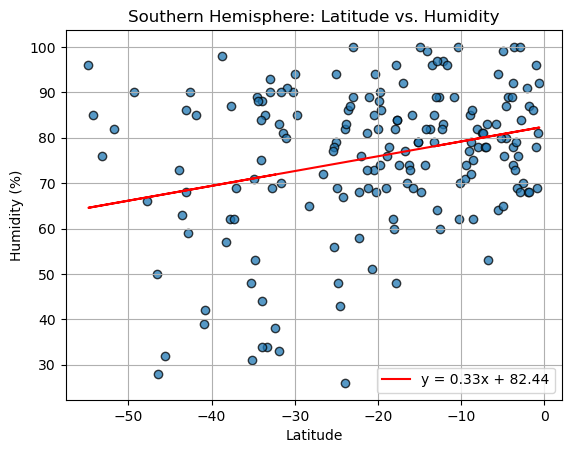

R-squared: 0.08


In [22]:
# Southern Hemisphere: Latitude vs. Humidity
plot_linear_regression(
    southern_hemi_df["Lat"],          
    southern_hemi_df["Humidity"],     
    x_label="Latitude",               
    y_label="Humidity (%)",           
    title="Southern Hemisphere: Latitude vs. Humidity",
    save_path="output_data/SH_Lat_vs_Humidity.png" 
)

**Discussion about the linear relationship:** The scatter plot and linear regression for the Northern Hemisphere show little to no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

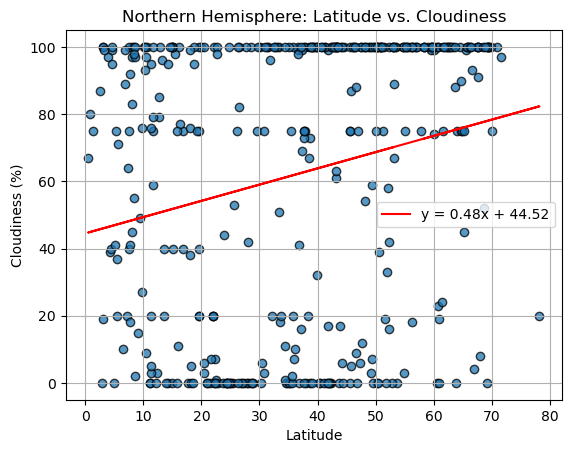

R-squared: 0.05


In [23]:
plot_linear_regression(
    northern_hemi_df["Lat"],          
    northern_hemi_df["Cloudiness"],   
    x_label="Latitude",               
    y_label="Cloudiness (%)",         
    title="Northern Hemisphere: Latitude vs. Cloudiness", 
    save_path="output_data/NH_Lat_vs_Cloudiness.png" 
)

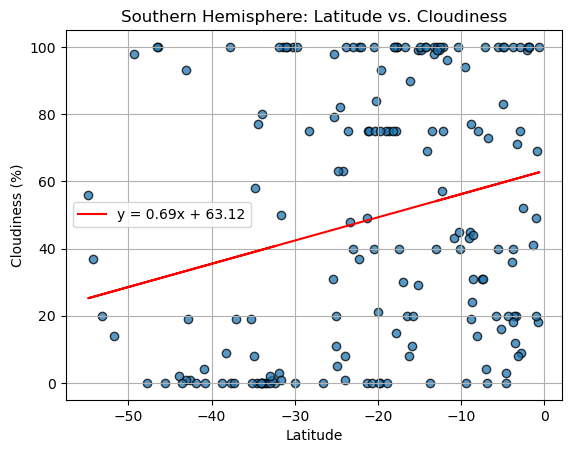

R-squared: 0.06


In [24]:
# Southern Hemisphere: Latitude vs. Cloudiness
plot_linear_regression(
    southern_hemi_df["Lat"],          # X-values: Latitude
    southern_hemi_df["Cloudiness"],   # Y-values: Cloudiness
    x_label="Latitude",               # X-axis label
    y_label="Cloudiness (%)",         # Y-axis label
    title="Southern Hemisphere: Latitude vs. Cloudiness", # Plot title
    save_path="output_data/SH_Lat_vs_Cloudiness.png" # File to save
)

**Discussion about the linear relationship:** The scatter plot and linear regression for the Northern Hemisphere show little or no significant correlation between latitude and wind speed.